## 케라스 모델

### Sequential 모델

**Sequential 클래스**

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [layers.Dense(64, activation="relu"), layers.Dense(10, activation="softmax")]
)

**점진적으로 Sequential 모델 만들기**

In [33]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**가중치를 만들기 위해 모델을 호출**

In [34]:
model.build(input_shape=(None, 3))
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_4/dense_20/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_4/dense_20/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_4/dense_21/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_4/dense_21/bias>]

**`summary` 메서드**

In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**`name` 매개변수로 모델과 층에 이름 지정**

In [36]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**모델의 입력 크기를 미리 지정하기**

In [37]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [38]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### 함수형 API

#### 간단한 예제

**두 개의 `Dense` 층을 가진 간단한 함수형 모델**

In [40]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [41]:
inputs = keras.Input(shape=(3,), name="my_input")

In [42]:
inputs.shape

(None, 3)

In [43]:
inputs.dtype

'float32'

In [44]:
features = layers.Dense(64, activation="relu")(inputs)

In [45]:
features.shape

(None, 64)

In [46]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [47]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 다중 입력, 다중 출력 모델

**다중 입력, 다중 출력 함수형 모델**

In [48]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(
    features
)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### 다중 입력, 다중 출력 모델 훈련하기

**입력과 타깃 배열 리스트를 전달하여 모델 훈련하기**

In [49]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)
model.fit(
    [title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1
)
model.evaluate(
    [title_data, text_body_data, tags_data], [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - department_accuracy: 0.3032 - loss: 34.1697 - priority_mean_absolute_error: 0.4733
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.0727 - loss: 24.6763 - priority_mean_absolute_error: 0.4888
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


**입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기**

In [50]:
model.compile(
    optimizer="rmsprop",
    loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
    metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]},
)
model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1,
)
model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - department_accuracy: 0.2718 - loss: 38.0448 - priority_mean_absolute_error: 0.4891
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.0727 - loss: 26.9186 - priority_mean_absolute_error: 0.4888
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


#### 함수형 API의 장점: 층 연결 구조 활용하기

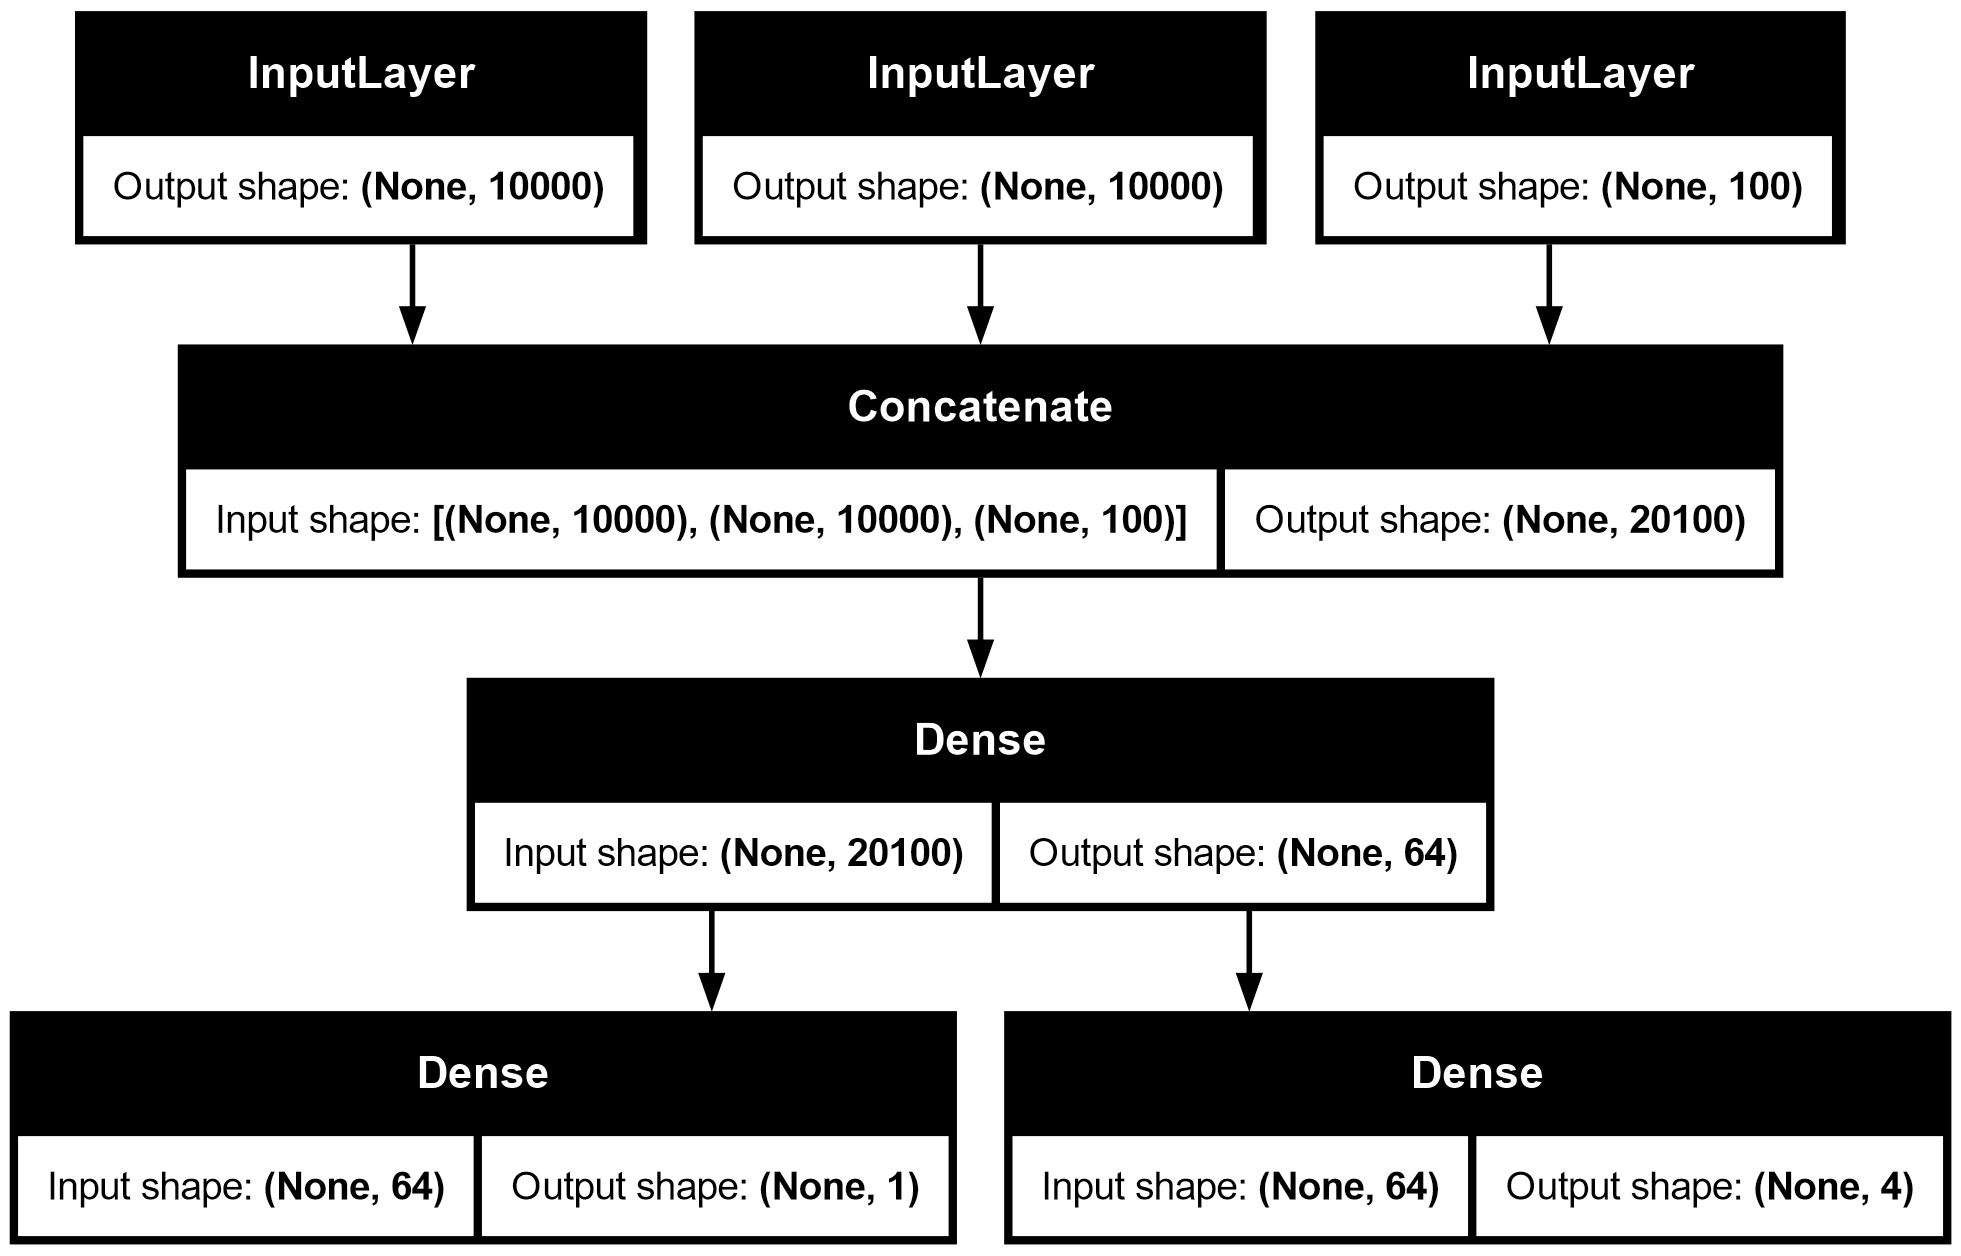

In [51]:
keras.utils.plot_model(model, show_shapes=True)

**함수형 모델에 있는 층의 입력과 출력을 출력하기**

In [52]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_2, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [53]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [54]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_41>

**중간 층의 출력을 재사용해 새로운 모델 만들기**

In [55]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags], outputs=[priority, department, difficulty]
)

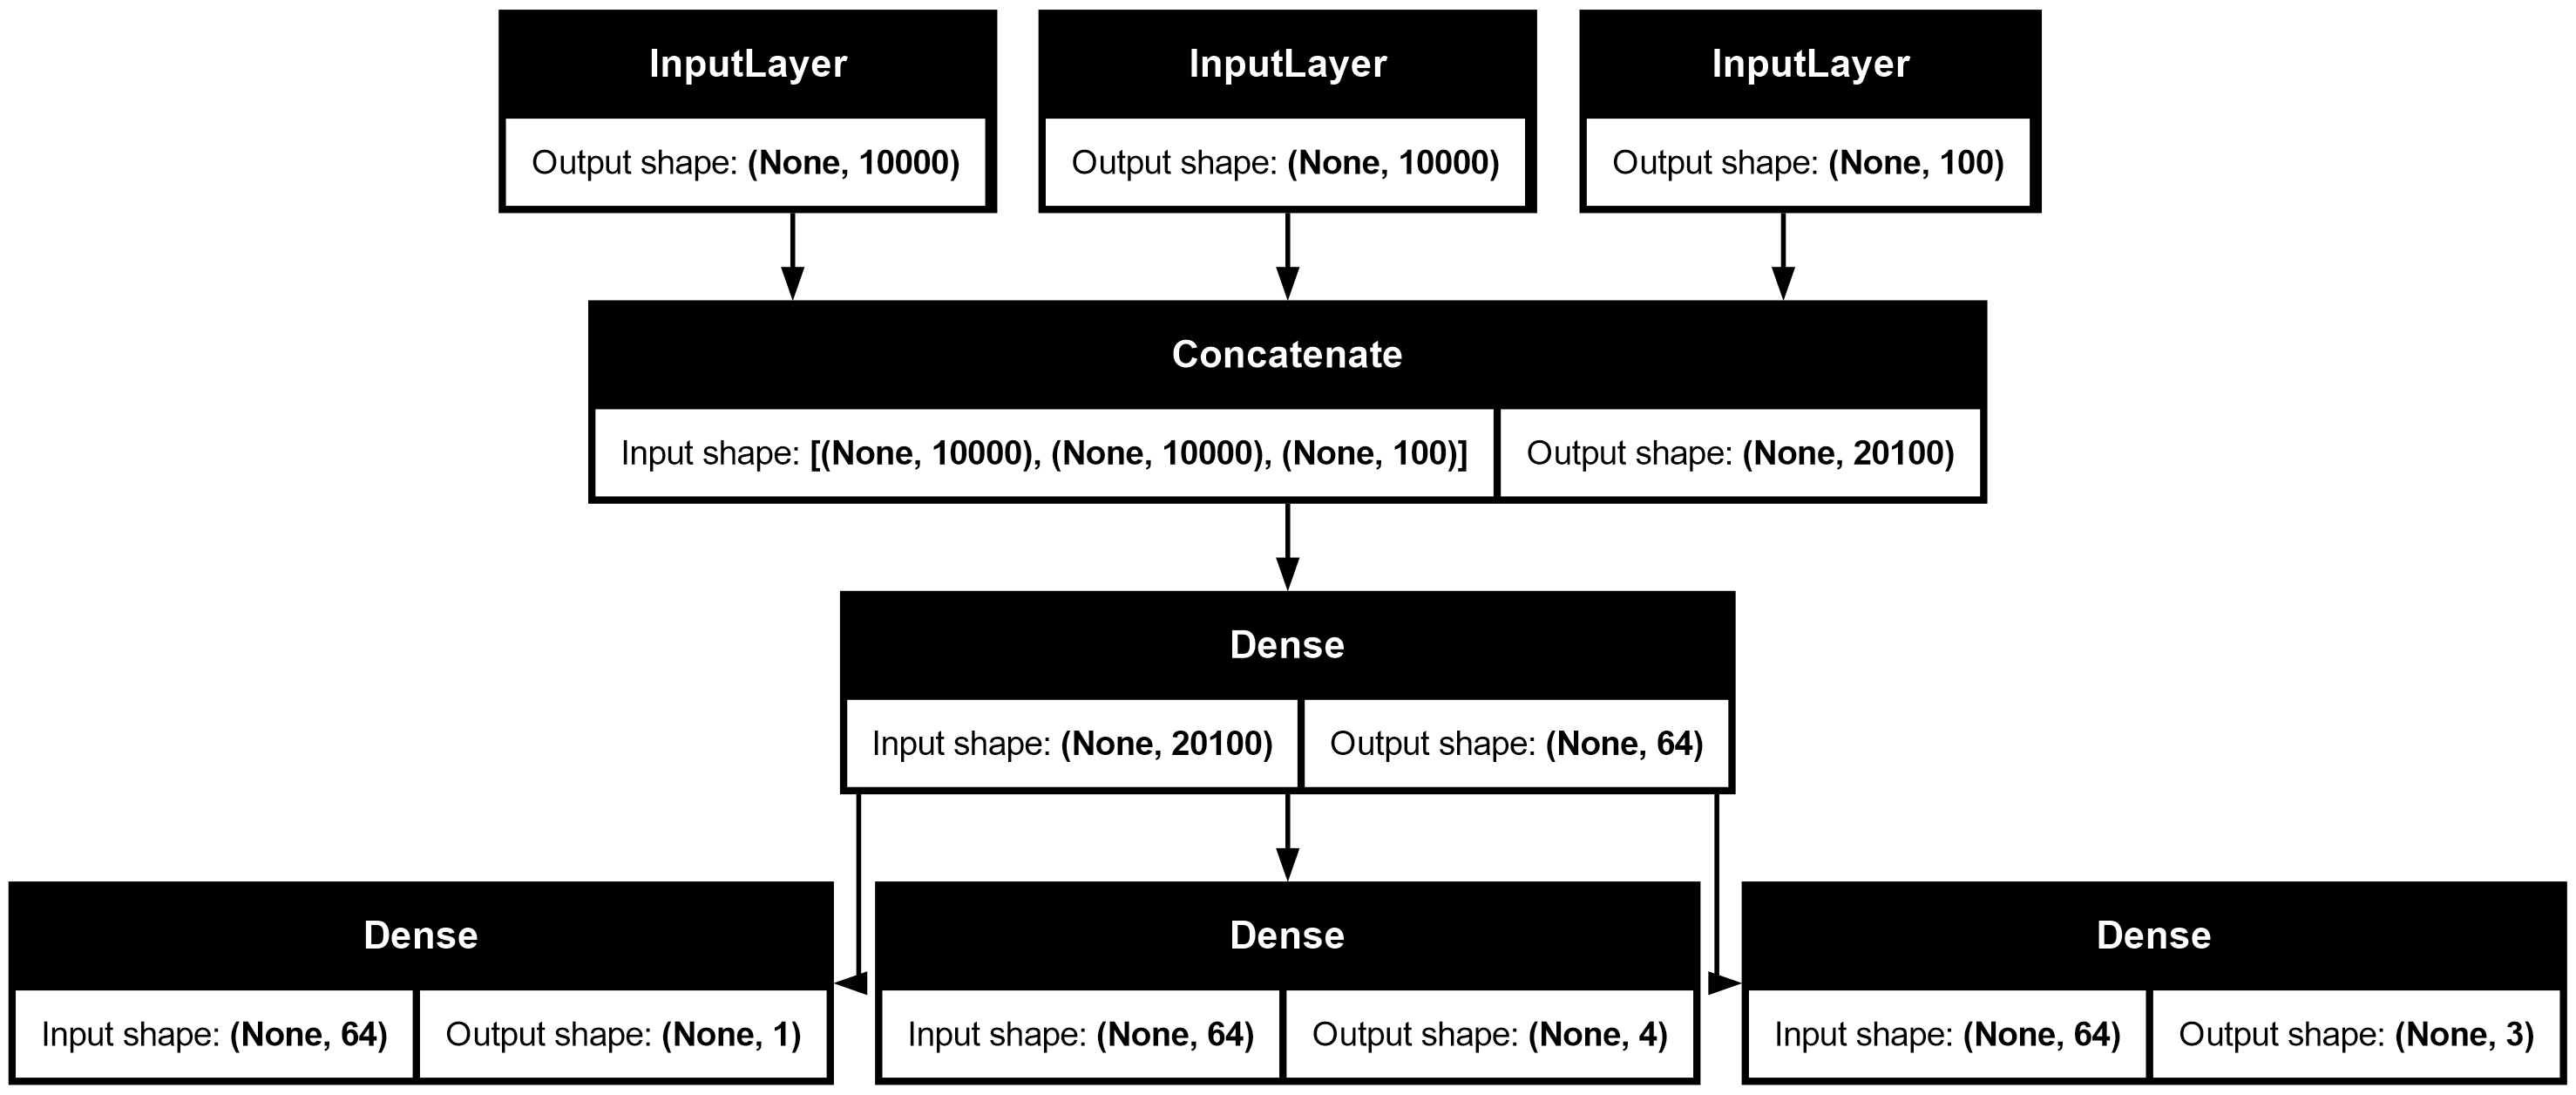

In [56]:
keras.utils.plot_model(new_model, show_shapes=True)

### Model 서브클래싱

#### 이전 예제를 서브클래싱 모델로 다시 만들기

**간단한 서브클래싱 모델**

In [57]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [58]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

In [59]:
model.compile(
    optimizer="rmsprop",

    loss=["mean_squared_error", "categorical_crossentropy"],

    metrics=[["mean_absolute_error"], ["accuracy"]],
)

model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},

    [priority_data, department_data],

    epochs=1,
)

model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},

    [priority_data, department_data],
)

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3530 - loss: 42.0803 - mean_absolute_error: 0.4898
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0730 - loss: 17.4108 - mean_absolute_error: 0.5112 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### 여러 방식을 혼합하여 사용하기

**서브클래싱한 모델을 포함하는 함수형 모델 만들기**

In [60]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)


inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**함수형 모델을 포함하는 서브클래싱 모델 만들기**

In [61]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)


class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)


model = MyModel()

## 내장된 훈련 루프와 평가 루프

**표준 워크플로: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [62]:
from tensorflow.keras.datasets import mnist


def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model


(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images, train_labels, epochs=3, validation_data=(val_images, val_labels)
)
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8688 - loss: 0.4436 - val_accuracy: 0.9580 - val_loss: 0.1423
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9512 - loss: 0.1678 - val_accuracy: 0.9688 - val_loss: 0.1084
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9633 - loss: 0.1299 - val_accuracy: 0.9713 - val_loss: 0.1107
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9671 - loss: 0.1168
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### 사용자 정의 지표 만들기

**`Metric` 클래스를 상속하여 사용자 정의 지표 구현하기**

In [95]:
import tensorflow as tf


class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32"
        )
    # 상태 업데이트 로직을 정의
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        se = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(se)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    # 지표값 반환
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    # 상태 초기화를 위한 메서드 
    def reset_state(self):
        self.mse_sum.assign(0.0)
        self.total_samples.assign(0)

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2940 - accuracy: 0.9138 - rmse: 7.1781 - val_loss: 0.1489 - val_accuracy: 0.9575 - val_rmse: 7.3622
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1603 - accuracy: 0.9536 - rmse: 7.3520 - val_loss: 0.1176 - val_accuracy: 0.9663 - val_rmse: 7.4008
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0961 - accuracy: 0.9742 - rmse: 7.4360


### 콜백 사용하기

#### EarlyStopping 콜백과 ModelCheckpoint 콜백

**`fit()` 메서드에서 `callbacks` 매개변수 사용하기**

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9129 - val_loss: 0.1410 - val_accuracy: 0.9595
Epoch 2/10
  54/1563 [>.............................] - ETA: 4s - loss: 0.1647 - accuracy: 0.9520

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 6s 4ms/step - loss: 0.1611 - accuracy: 0.9544 - val_loss: 0.1162 - val_accuracy: 0.9678
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1292 - accuracy: 0.9637 - val_loss: 0.1022 - val_accuracy: 0.9735
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1147 - accuracy: 0.9672 - val_loss: 0.0990 - val_accuracy: 0.9740
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1038 - accuracy: 0.9710 - val_loss: 0.0937 - val_accuracy: 0.9758
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0956 - accuracy: 0.9739 - val_loss: 0.0913 - val_accuracy: 0.9782
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0884 - accuracy: 0.9761 - val_loss: 0.0879 - val_accuracy: 0.9791
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9775 - val_loss: 0.0942 - val_accuracy: 0.9795
Epo

In [ ]:
model = keras.models.load_model("checkpoint_path.h5")

### 사용자 정의 콜백 만들기

**`Callback` 클래스를 상속하여 사용자 정의 콜백 만들기**

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.9127 - val_loss: 0.1426 - val_accuracy: 0.9595
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1584 - accuracy: 0.9535 - val_loss: 0.1103 - val_accuracy: 0.9688
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1296 - accuracy: 0.9626 - val_loss: 0.1072 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1141 - accuracy: 0.9691 - val_loss: 0.1017 - val_accuracy: 0.9749
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1033 - accuracy: 0.9717 - val_loss: 0.1009 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0941 - accuracy: 0.9740 - val_loss: 0.0942 - val_accuracy: 0.9764
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0892 - accuracy: 0.9763 - val_loss: 0.0884 - val_accuracy:

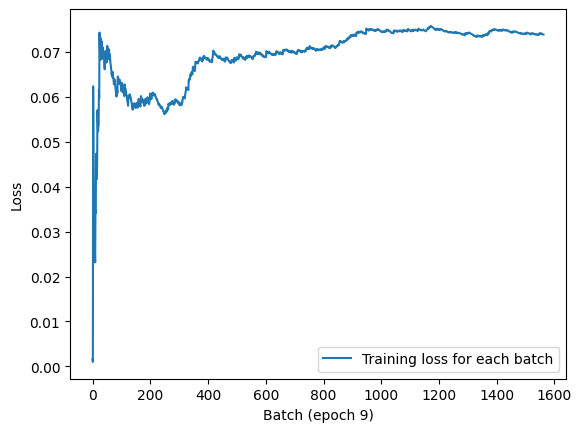

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드를 사용한 모니터링과 시각화

In [64]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard],
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8632 - loss: 0.4500 - val_accuracy: 0.9582 - val_loss: 0.1470
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9515 - loss: 0.1641 - val_accuracy: 0.9676 - val_loss: 0.1158
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9614 - loss: 0.1350 - val_accuracy: 0.9718 - val_loss: 0.1069
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9697 - loss: 0.1070 - val_accuracy: 0.9735 - val_loss: 0.1049
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.1014 - val_accuracy: 0.9740 - val_loss: 0.0994
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9742 - loss: 0.0909 - val_accuracy: 0.9771 - val_loss: 0.0956
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.0822 - val_accuracy: 0.9784 - val_loss: 0.0903
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9781 - loss: 0.0807 - 

In [65]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 22008), started 0:01:39 ago. (Use '!kill 22008' to kill it.)

In [66]:
!kill 22008

'kill' is not recognized as an internal or external command,
operable program or batch file.


## 사용자 정의 훈련, 평가 루프 만들기

In [68]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradients(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(model.trainable_weights, gradients))

### 훈련 vs 추론

### 측정 지표의 저수준 사용법

In [103]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
# metric.update_state(targets, predictions)    #이전 텐서플로우버전에선 작동
metric.update_state(np.array(targets), predictions)  # 2.16.1버전에서는 타입변환이 필요
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [98]:
tf.__version__

'2.16.1'

In [74]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


### 완전한 훈련과 평가 루프

**단계별 훈련 루프 작성하기: 훈련 스텝 함수**

In [92]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()


def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**단계별 훈련 루프 작성하기: 지표 재설정**

In [93]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**단계별 훈련 루프 작성하기: 훈련 루프 자체**

In [96]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9125
...loss: 0.2927
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9541
...loss: 0.1612
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9632
...loss: 0.1325


**단계별 평가 루프 작성하기**

In [100]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs


val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9667
...val_loss: 0.1244


### tf.function로 성능 높이기

**평가 스텝 함수에 `@tf.function` 데코레이터 추가하기**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9672
...val_loss: 0.1191


### fit() 메서드를 사용자 정의 훈련 루프로 활용하기

**`fit()`이 사용할 사용자 정의 훈련 스텝 구현하기**

In [104]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")


class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [105]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4526
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1631
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1350


In [106]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [107]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


c:\Users\zzoon\anaconda3\envs\tensorflow\lib\site-packages\keras\src\backend\tensorflow\trainer.py:603: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight)`.
  warnings.warn(
c:\Users\zzoon\anaconda3\envs\tensorflow\lib\site-packages\keras\src\backend\tensorflow\trainer.py:578: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - sparse_categorical_accuracy: 0.8603 - loss: 0.1000
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - sparse_categorical_accuracy: 0.9518 - loss: 0.1000
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - sparse_categorical_accuracy: 0.9644 - loss: 0.1000


## 기록

## 회고

케라스를 커스텀해서 사용해본 경험이 없었고 엄두를 안내고 있었는데, 공부하게 되서 좋았다. 원래 딥러닝에서 레이어가 복잡해질수록 성능은 좋아지지만 과적합을 해결해야 한다는 것을 알고 있었지만, 플레이그라운드를 통해 시각적으로 볼 수 있어서 좋았다. 다만, 깊은 층에 대해서는 생각만큼의 성능향상이 없어 충격을 받았다. 

### 플레이그라운드 후기

딥러닝에서 레이어 층을 깊게 하는 것이 생각보다 의미가 없는 일이었고, 층을 넓히는 경우 성능이 좋아지기는 하지만 과적합에 유의해야 한다는 것을 느꼈습니다. 더불어 매개변수가 많이 증가하니 연산량 또한 고려를 해야할 거 같았다.
딥러닝이 피처 선택이 필요없다고는 해도, 결국 제일 중요한 것은 피처 선택이라는 것을 느끼게 되었다.